# Import Modules 


In [97]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading The Dataset

In [98]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
# to display statistic about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [101]:
# to display info about datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [102]:
# to display number of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing The Dataset

In [103]:
# check for null values 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

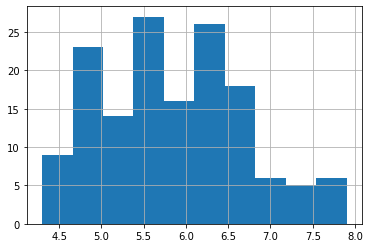

In [104]:
# Histograms
df['SepalLengthCm'].hist()

<AxesSubplot:>

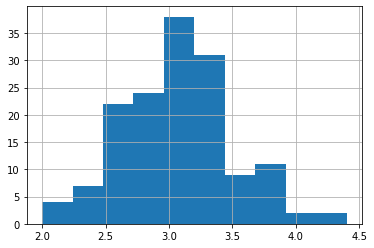

In [105]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

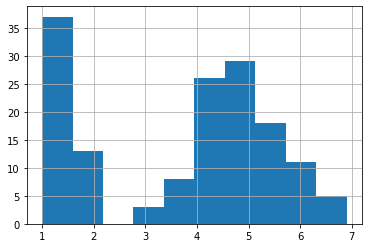

In [106]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

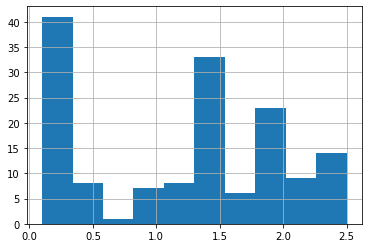

In [107]:
df['PetalWidthCm'].hist()

In [108]:
# Scatterplot 
colors = ['red','orange','green']
species= ['Iris-setosa','Iris-versicolor','Iris-virginica']

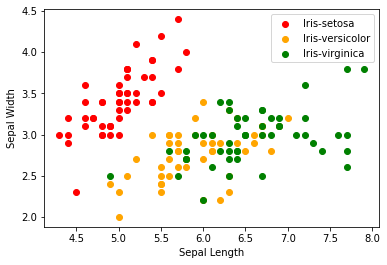

In [109]:
for i in range (3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

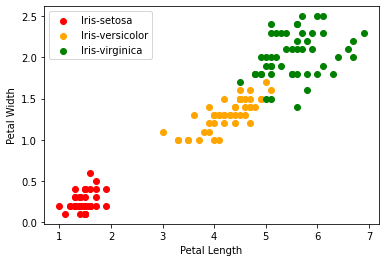

In [110]:
for i in range (3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

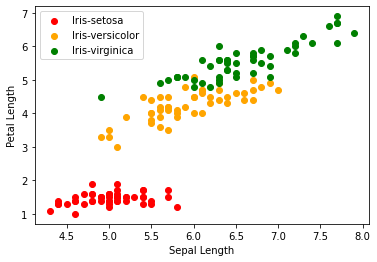

In [111]:
for i in range (3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

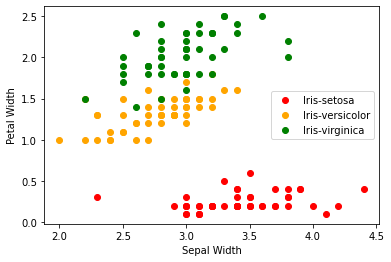

In [112]:
for i in range (3):
    x = df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

In [113]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

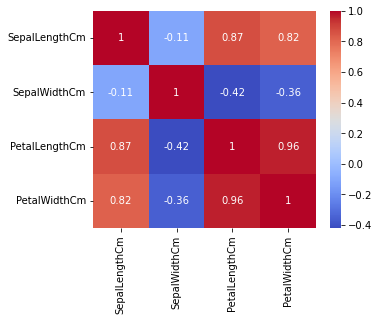

In [114]:
corr = df.corr()
fig , ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr , annot=True, ax = ax , cmap = 'coolwarm')

# Label Encoder

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [116]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [117]:
from sklearn.model_selection import train_test_split
#train - 70%
#test - 30%
X = df.drop(columns=['Species'])
Y = df['Species']
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.30)

In [118]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()

In [119]:
#model training
model.fit(x_train , y_train)

LogisticRegression()

In [120]:
# print metric to get prformance 
print('Accuracy',model.score(x_test,y_test)*100)

Accuracy 95.55555555555556


In [121]:
# knn = k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier()

In [122]:
model.fit(x_train , y_train)

KNeighborsClassifier()

In [123]:
print('Accuracy',model.score(x_test,y_test)*100)

Accuracy 91.11111111111111


In [124]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [125]:
model.fit(x_train , y_train)

DecisionTreeClassifier()

In [126]:
print('Accuracy',model.score(x_test,y_test)*100)

Accuracy 93.33333333333333
